In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('Soil Fertility Data (Modified Data).csv')
data.head()

,N,P,K,ph,ec,oc,S,zn,fe,cu,Mn,B,fertility
0,138,8.6,560,7.46,0.62,0.70,5.9,0.24,0.31,0.77,8.71,0.11,0
1,213,7.5,338,7.62,0.75,1.06,25.4,0.30,0.86,1.54,2.89,2.29,0
2,163,9.6,718,7.59,0.51,1.11,14.3,0.30,0.86,1.57,2.70,2.03,0
3,157,6.8,475,7.64,0.58,0.94,26.0,0.34,0.54,1.53,2.65,1.82,0
4,220,8.6,444,7.43,0.65,0.72,11.7,0.37,0.66,0.90,2.19,1.82,0


In [4]:
data.isna().sum()

N            0
P            0
K            0
ph           0
ec           0
oc           0
S            0
zn           0
fe           0
cu           0
Mn           0
B            0
fertility    0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1288 entries, 0 to 1287
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   N          1288 non-null   int64  
 1   P          1288 non-null   float64
 2   K          1288 non-null   int64  
 3   ph         1288 non-null   float64
 4   ec         1288 non-null   float64
 5   oc         1288 non-null   float64
 6   S          1288 non-null   float64
 7   zn         1288 non-null   float64
 8   fe         1288 non-null   float64
 9   cu         1288 non-null   float64
 10  Mn         1288 non-null   float64
 11  B          1288 non-null   float64
 12  fertility  1288 non-null   int64  
dtypes: float64(10), int64(3)
memory usage: 130.9 KB


In [7]:
data.shape

(1288, 13)

In [8]:
data.corr( numeric_only = True)

,N,P,K,ph,ec,oc,S,zn,fe,cu,Mn,B,fertility
N,1.000000,0.093832,0.038923,0.121486,-0.070546,0.008829,-0.235340,0.023866,0.099257,-0.256674,0.130461,-0.240333,0.659255
P,0.093832,1.000000,0.100911,0.016134,0.088453,-0.002942,-0.113835,-0.018667,0.100791,-0.069810,-0.059330,-0.101292,0.234447
K,0.038923,0.100911,1.000000,0.027218,-0.090475,-0.022500,0.058651,0.000427,-0.152482,-0.075039,0.030665,0.125149,0.001726
ph,0.121486,0.016134,0.027218,1.000000,0.018229,-0.029233,0.027662,-0.008797,-0.046303,0.015778,-0.020260,0.014457,0.127335
ec,-0.070546,0.088453,-0.090475,0.018229,1.000000,0.003355,0.099952,-0.024310,-0.086731,0.023008,0.005247,0.007272,-0.081856
oc,0.008829,-0.002942,-0.022500,-0.029233,0.003355,1.000000,0.043683,0.605668,0.210331,0.015133,-0.064141,0.090147,0.043513
S,-0.235340,-0.113835,0.058651,0.027662,0.099952,0.043683,1.000000,-0.006780,-0.216963,0.177997,-0.132230,0.429421,-0.157644
zn,0.023866,-0.018667,0.000427,-0.008797,-0.024310,0.605668,-0.006780,1.000000,0.467914,-0.030785,-0.054453,0.057715,-0.001295
fe,0.099257,0.100791,-0.152482,-0.046303,-0.086731,0.210331,-0.216963,0.467914,1.000000,0.186790,0.225458,-0.379040,0.010342
cu,-0.256674,-0.069810,-0.075039,0.015778,0.023008,0.015133,0.177997,-0.030785,0.186790,1.000000,0.068562,0.062537,-0.178057


<Axes: >

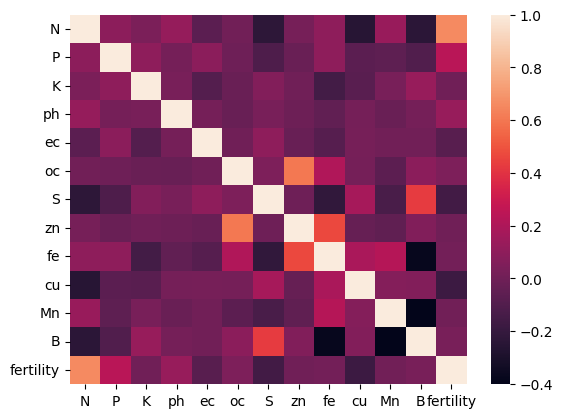

In [25]:
sns.heatmap(data.corr( numeric_only = True))# used when we want to get the relation between all the numerial quantities

In [10]:
data.columns

Index(['N', 'P', 'K', 'ph', 'ec', 'oc', 'S', 'zn', 'fe', 'cu', 'Mn', 'B',
       'fertility'],
      dtype='object')

In [23]:
data['fertility'].value_counts()

fertility
2    447
1    440
0    401
Name: count, dtype: int64

0 describes low-fertility
1 describes medium-fertility
2 describes high-fertility

In [24]:
rawDataCopy = data.copy()
rawDataCopy.head()

,N,P,K,ph,ec,oc,S,zn,fe,cu,Mn,B,fertility
0,138,8.6,560,7.46,0.62,0.70,5.9,0.24,0.31,0.77,8.71,0.11,0
1,213,7.5,338,7.62,0.75,1.06,25.4,0.30,0.86,1.54,2.89,2.29,0
2,163,9.6,718,7.59,0.51,1.11,14.3,0.30,0.86,1.57,2.70,2.03,0
3,157,6.8,475,7.64,0.58,0.94,26.0,0.34,0.54,1.53,2.65,1.82,0
4,220,8.6,444,7.43,0.65,0.72,11.7,0.37,0.66,0.90,2.19,1.82,0


In [28]:
labels = rawDataCopy[['fertility']]
features = rawDataCopy.drop('fertility', axis=1)

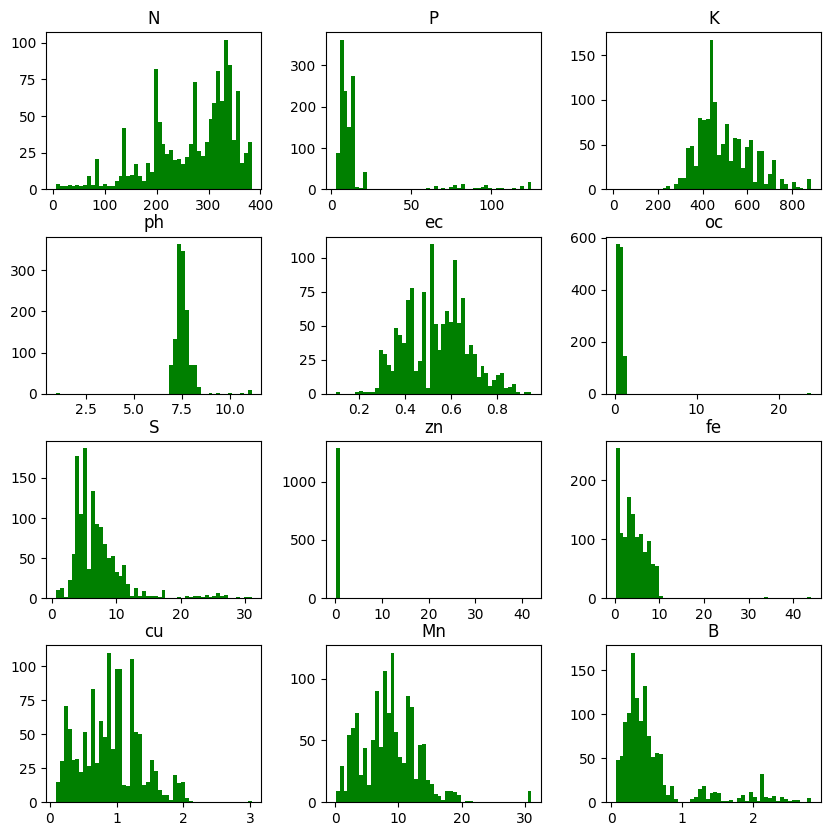

In [29]:
features.hist(bins=50, figsize=(10, 10), color ='green', grid=False)
plt.show()

<Axes: ylabel='Density'>

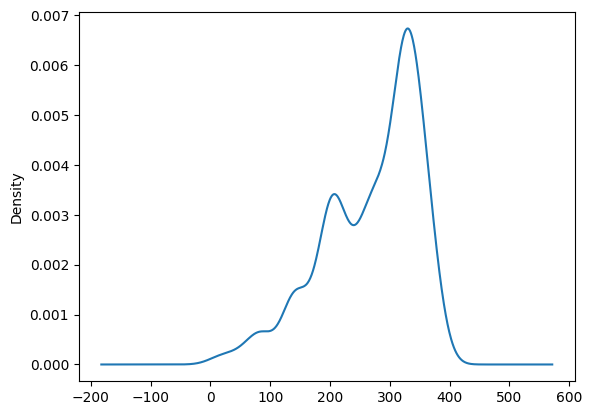

In [31]:
data["N"].plot(kind = "kde")#normal Distribution

In [103]:
print(data)

        N     P    K    ph    ec    oc      S    zn    fe    cu     Mn     B  \
0     138   8.6  560  7.46  0.62  0.70   5.90  0.24  0.31  0.77   8.71  0.11   
1     213   7.5  338  7.62  0.75  1.06  25.40  0.30  0.86  1.54   2.89  2.29   
2     163   9.6  718  7.59  0.51  1.11  14.30  0.30  0.86  1.57   2.70  2.03   
3     157   6.8  475  7.64  0.58  0.94  26.00  0.34  0.54  1.53   2.65  1.82   
4     220   8.6  444  7.43  0.65  0.72  11.70  0.37  0.66  0.90   2.19  1.82   
...   ...   ...  ...   ...   ...   ...    ...   ...   ...   ...    ...   ...   
1283  326  13.4  454  7.13  0.51  0.88   5.13  0.29  4.85  0.78   9.32  0.27   
1284  333  14.9  422  8.26  0.48  1.17   3.32  0.60  7.62  1.02  11.65  0.29   
1285  320  13.8  391  7.38  0.65  0.68   7.54  0.38  5.41  0.89   9.05  0.63   
1286  333  14.3  507  7.43  0.61  0.88   7.24  0.37  1.26  1.37  12.03  0.29   
1287  358  13.2  444  7.80  0.29  0.49   4.52  0.26  5.26  1.25   6.25  0.48   

      fertility  
0             0  
1  

In [105]:
print(data.columns)  # This will list all feature names

Index(['N', 'P', 'K', 'ph', 'ec', 'oc', 'S', 'zn', 'fe', 'cu', 'Mn', 'B',
       'fertility'],
      dtype='object')


In [106]:
from sklearn.datasets import load_iris
import pandas as pd

# Load dataset
iris = load_iris()

# Get feature names BEFORE converting to DataFrame
print(iris.feature_names)

# Convert to DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)
print(df.columns)


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')


In [119]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [120]:

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

# Initialize and train model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

In [121]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'macro' or 'micro' as needed
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [122]:
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


In [123]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

